# MCMC target matrices obtained after every cut

In [2]:
import bigQueryPlotting as b
import sys
import os
import numpy as np
import json
import glob
import pandas as pd

%pylab inline
%run utils.py

os.chdir("..")

sys.path.insert(0,'2.counting/mcmc_py')


import pd_model




Populating the interactive namespace from numpy and matplotlib


ImportError: No module named pd_model

In [29]:
tableMC="AMS.protonsB1034"
tableData="AMS.Data"

In [23]:

########################################################################################
#
# Define Track Selection
#
########################################################################################

# 1) Mask defined cuts
mask=[]
mask.append("physicsTrigger")
mask.append("betaNotCrazy")
mask.append("chargeOne")
mask.append("oneTrack")
mask.append("goldenTOF")
mask.append("goldenTRACKER")
mask.append("goldenTRD")
mask.append("oneParticle")

In [2]:


################################################################################
#
#  MAKE BINNINGS
#
################################################################################
#
# "Theoretical" binning (the one we will look the spectrum for)
#  is bootstrapped from R-vs-beta curves for D and P
#
def make_beta_bins(beta):
    bbins = []
    for i in range(10):
        bbins.append(beta)
        beta = pd_model.beta_from_R(pd_model.R_from_beta(beta,pd_model.md),pd_model.mp)
    return bbins

bbins = make_beta_bins(0.5)
bbins += make_beta_bins((bbins[1]+bbins[0])/2)
bbins = sorted(bbins)

mid1,mid2 = (bbins[1]+bbins[0])/2,(bbins[2]+bbins[1])/2
bbins += make_beta_bins(mid1)
bbins += make_beta_bins(mid2)
bbins = np.array([bbin for bbin in sorted(bbins) if 1 < pd_model.R_from_beta(bbin,pd_model.mp) < 30 ])

binningBetaTheoretic, binningRgdtTheoretic = np.array([bbins, pd_model.R_from_beta(bbins, pd_model.mp)])

#
# Measured values binnings are not very fancy
#
binningBetaMeasured = 1/np.linspace(0.5,2,28)
binningBetaMeasured.sort()

binningRgdtMeasured = np.logspace(-5.0 / 19, 1, 25)



#########################################################################################
#
# Define preselection
#
########################################################################################
# 1) Asking for at least 3 TOF layers with some deposited energy
cut3TOFLayers = " ( (EdepTOF_0>0.3)+(EdepTOF_1>0.3)+(EdepTOF_2>0.3)+(EdepTOF_3>0.3) >= 3) "

# 2) Asking for downgoing particle
mask=[]
mask.append("downGoing")

b.setTable(tableMC)
preselectionMC=b.makeSelectionMask(mask) + " AND " + cut3TOFLayers

b.setTable(tableData)
preselectionData=b.makeSelectionMask(mask) + " AND " + cut3TOFLayers


m=[]

for _m in mask:
    m.append(_m)
    
    b.setTable(tableMC)
    MC=b.makeSelectionMask(m)

    b.setTable(tableData)
    data=b.makeSelectionMask(m)
    
    
    l={'binningBetaTheoretic':binningBetaTheoretic.tolist(),
   'binningRgdtTheoretic':binningRgdtTheoretic.tolist(),
   'binningBetaMeasured':binningBetaMeasured.tolist(),
   'binningRgdtMeasured':binningRgdtMeasured.tolist(),
   'preselectionMC':preselectionMC,
   'preselectionData':preselectionData,
   'trackSelectionMC':MC,
   'trackSelectionData':data,
   'tableMC':tableMC,
   'tableData':tableData
    }

    f=open('param_'+_m+'.json','w')
    json.dump(l,f,indent=4)
    f.close()



global bigQueryTable set to : AMS.protonsB1034
bq --format json show AMS.protonsB1034
bq --format json show AMS.protonsB1034
{"kind":"bigquery#table","creationTime":"1433174373610","tableReference":{"projectId":"ams-test-kostya","tableId":"protonsB1034","datasetId":"AMS"},"numRows":"65308451","numBytes":"39243956885","etag":"\"iBDiwpngzDA0oFU5jqZ4ksWOrjA/MTQzMzQyMzMyMDU0OQ\"","location":"US","lastModifiedTime":"1433423320549","type":"TABLE","id":"ams-test-kostya:AMS.protonsB1034","selfLink":"https://www.googleapis.com/bigquery/v2/projects/ams-test-kostya/datasets/AMS/tables/protonsB1034","schema":{"fields":[{"type":"INTEGER","name":"Index","mode":"NULLABLE"},{"type":"INTEGER","name":"Run","mode":"NULLABLE"},{"type":"INTEGER","name":"Event","mode":"NULLABLE"},{"type":"INTEGER","name":"UTime","mode":"NULLABLE"},{"type":"FLOAT","name":"JMDCTime","mode":"NULLABLE"},{"type":"FLOAT","name":"ThetaS","mode":"NULLABLE"},{"type":"FLOAT","name":"PhiS","mode":"NULLABLE"},{"type":"FLOAT","name":"Li

In [2]:
os.chdir('/home/benoit/workspace/deutons/2.counting/mcmc_py')
import produceMatrices
for _m in mask:
    produceMatrices.main(json.load(open('param_'+_m+'.json')),outFilename='target_'+_m+'.csv')

Waiting on bqjob_r4bd71f3c08fd6755_0000014f2815ee65_1 ... (0s) Current status: DONE   
Waiting on bqjob_r731dad4860c42792_0000014f2815faa9_2 ... (2s) Current status: DONE   
Waiting on bqjob_r671cacd98e36691b_0000014f2816137e_3 ... (4s) Current status: DONE   
Waiting on bqjob_r8723d5fa491047e_0000014f281637f3_4 ... (2s) Current status: DONE   
Waiting on bqjob_rf231017eb7e95df_0000014f2816505d_5 ... (1s) Current status: DONE   
Waiting on bqjob_r9ab441225c95395_0000014f28166489_6 ... (3s) Current status: DONE   
Waiting on bqjob_r63d3ca2ed78b0f16_0000014f28168482_7 ... (1s) Current status: DONE   
Waiting on bqjob_r7e72c65482413520_0000014f281699f5_8 ... (1s) Current status: DONE   
Waiting on bqjob_r6a53558a186d83e3_0000014f2816ad86_9 ... (4s) Current status: DONE   
Waiting on bqjob_r643f787bf6bb6aeb_0000014f2816d19f_10 ... (2s) Current status: DONE   
Waiting on bqjob_r431872385e0b3004_0000014f2816e6ed_11 ... (0s) Current status: DONE   
Waiting on bqjob_r1766f5ef0cf8f28c_0000014f2

Populating the interactive namespace from numpy and matplotlib


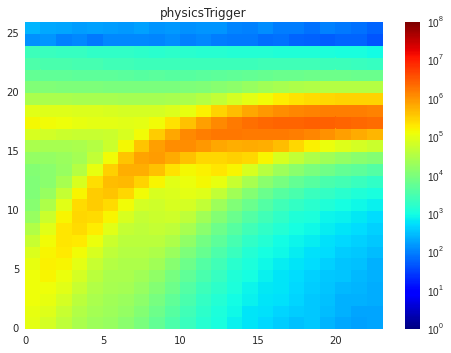

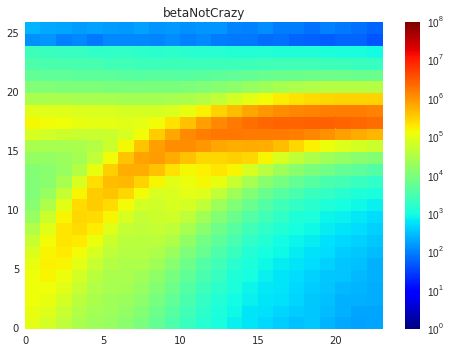

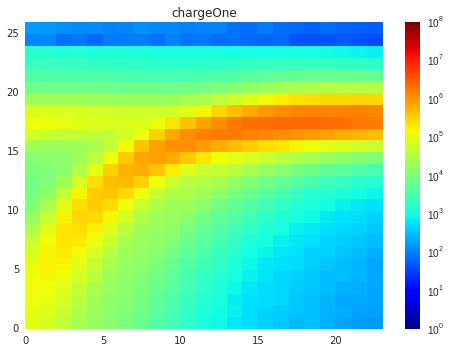

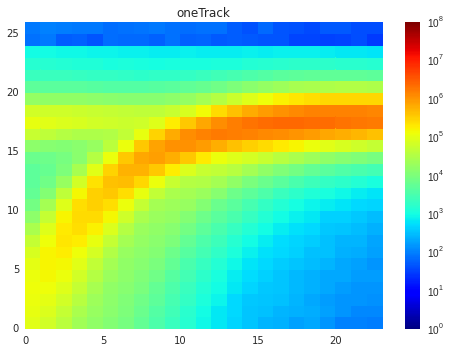

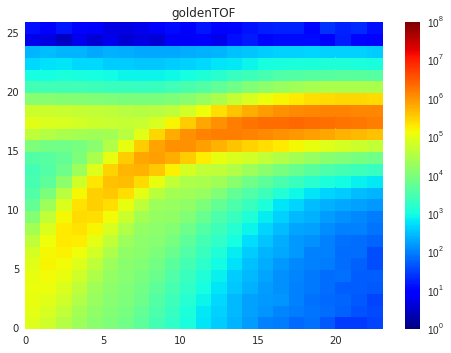

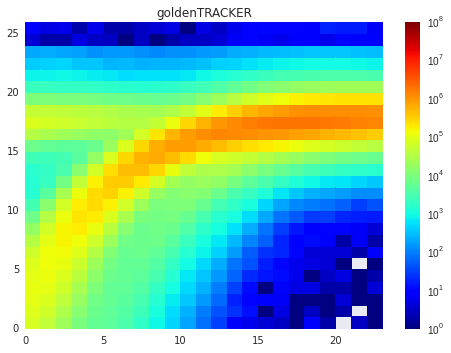

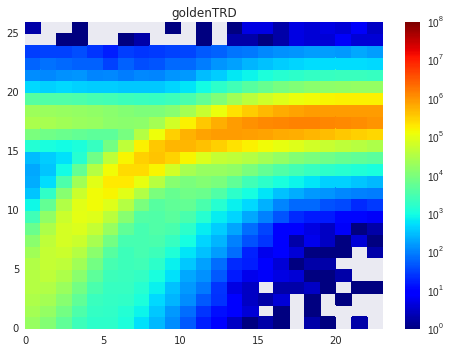

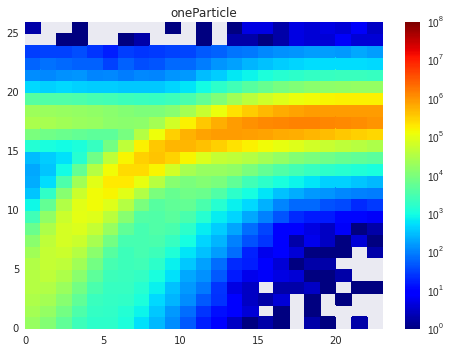

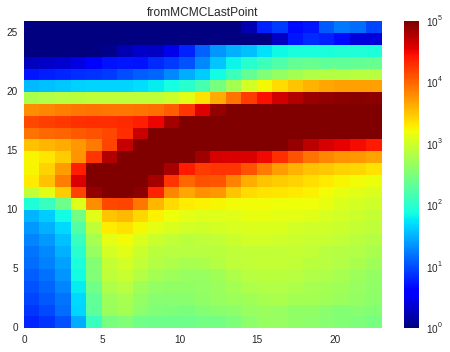

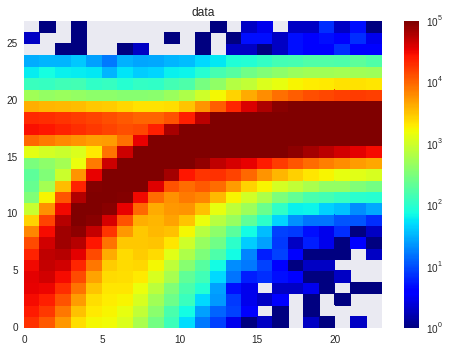

In [29]:
import seaborn as s
from matplotlib.colors import LogNorm

s.set(rc={'image.cmap': "jet"})
# s.set(rc={'image.cmap': "Blues"})


def plotTargetMatrix(aTitle,filename,sep):
    figure()
    title(aTitle)
    df=pd.read_csv(filename,
                header=None,sep=sep).drop(24,axis=1)
    fig=plot_matrix(df,norm=LogNorm(vmin=1,vmax=1e5))
    colorbar(fig)

plotTargetMatrix('fromMCMCLastPoint','/afs/cern.ch/user/b/bcoste/deutons/2.counting/mcmc/test0/lastPointPredictedMatrix.txt',sep=',')
plotTargetMatrix('data','/home/benoit/workspace/deutons/2.counting/datasets/observed_data.txt',sep=' ')

# Mass distribution after every cuts

In [87]:
mass='Rfull/BetaTOF * SQRT(1-pow(BetaTOF,2))'

b.setTable(tableData)

aMask=['downGoing']
hists=dict()
for m in mask:
    aMask.append(m)
    
    preselectionData=b.makeSelectionMask(aMask)
    hists[m]=b.hist(200,0.1,4,mass,preselectionData + ' AND BetaTOF > 0.5 AND BetaTOF < 0.85 ')


global bigQueryTable set to : AMS.Data
bq --format json show AMS.Data
bq --format json show AMS.Data
{"kind":"bigquery#table","creationTime":"1431874540725","tableReference":{"projectId":"ams-test-kostya","tableId":"Data","datasetId":"AMS"},"numRows":"351907866","numBytes":"176196485737","etag":"\"Z3HObDhXojooa4HMhn6g_TKSS-c/MTQzMjcyNzg3NzcxNw\"","location":"US","lastModifiedTime":"1432727877717","type":"TABLE","id":"ams-test-kostya:AMS.Data","selfLink":"https://www.googleapis.com/bigquery/v2/projects/ams-test-kostya/datasets/AMS/tables/Data","schema":{"fields":[{"type":"INTEGER","name":"Index"},{"type":"INTEGER","name":"Run"},{"type":"INTEGER","name":"Event"},{"type":"INTEGER","name":"UTime"},{"type":"FLOAT","name":"JMDCTime","description":""},{"type":"FLOAT","name":"ThetaS"},{"type":"FLOAT","name":"PhiS"},{"type":"FLOAT","name":"Livetime"},{"type":"FLOAT","name":"Latitude"},{"type":"FLOAT","name":"Rcutoff"},{"type":"INTEGER","name":"PhysBPatt"},{"type":"INTEGER","name":"JMembPatt"},{

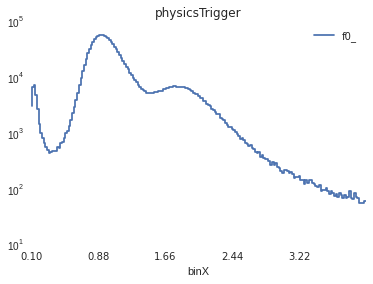

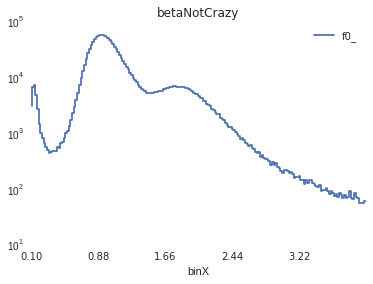

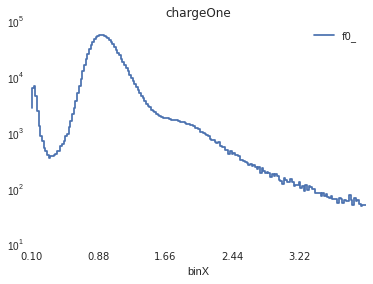

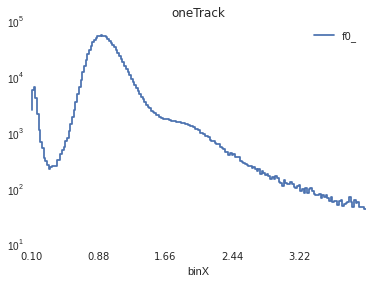

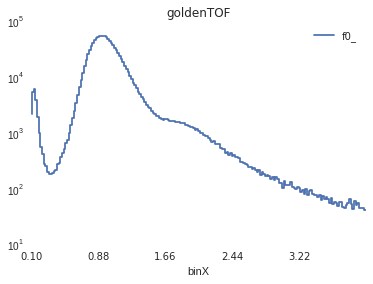

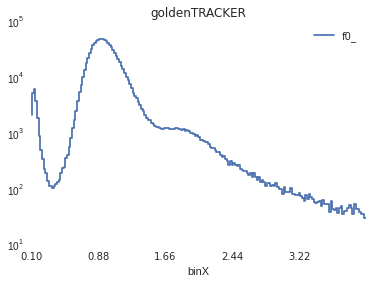

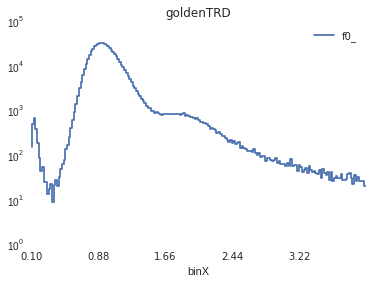

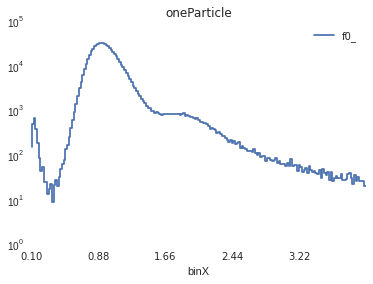

In [91]:
for m in aMask[1:]:
    hists[m].plot(logy=True)
    title(m)



{'betaNotCrazy': <bigQueryPlotting.Hist instance at 0x7f4d4a92eb90>,
 'chargeOne': <bigQueryPlotting.Hist instance at 0x7f4d4a9547a0>,
 'goldenTOF': <bigQueryPlotting.Hist instance at 0x7f4d4e89ab90>,
 'goldenTRACKER': <bigQueryPlotting.Hist instance at 0x7f4d4e994290>,
 'goldenTRD': <bigQueryPlotting.Hist instance at 0x7f4d4eb9c5f0>,
 'oneParticle': <bigQueryPlotting.Hist instance at 0x7f4d4ec35b00>,
 'oneTrack': <bigQueryPlotting.Hist instance at 0x7f4d4b77a488>,
 'physicsTrigger': <bigQueryPlotting.Hist instance at 0x7f4d4b52ae60>}